## Exploring multi-passport holders in Bristol by constituency (2021 Census)

In [284]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas


In [285]:
## Checking the file path exists / is correct
json_path = "constituency_data.json"
os.path.exists(json_path)

True

#### Reading the data into a DF

In [286]:
df = pd.read_json("constituency_data.json")
df = df.reset_index()
df = df.rename(columns={'index':'Passport'})
df.head(5)

,Passport,Bristol Central,Bristol East,Bristol North East,Bristol North West,Bristol South
0,Does not apply,0,0,0,0,0
1,UK passport only,69642,80497,73188,80710,76521
2,Irish passport only,834,573,369,665,548
3,"Other passport only: Europe, European Union",7507,9380,6732,8080,6535
4,"Other passport only: Europe, Other Europe",456,363,266,242,211


#### Dropping columns for those that are not UK passport holders and that do not hold more than one passport. 

In [287]:
mp = df.drop(index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 16,17,18,19,20,21,23])
mp

,Passport,Bristol Central,Bristol East,Bristol North East,Bristol North West,Bristol South
9,Two passports held: UK and Irish passport,1002,395,221,630,337
10,"UK and Other passport: Europe, European Union",1372,698,522,929,526
11,"UK and Other passport: Europe, Other Europe",177,82,82,148,62
12,UK and Other passport: African,328,269,240,320,164
13,UK and Other passport: Middle East and Asian,431,271,334,355,155
14,UK and Other passport: The Americas and Caribbean,1040,416,240,498,351
15,UK and Other passport: Antarctica and Oceania ...,721,301,161,395,291
22,"UK, Irish, and Other passport",36,12,8,10,11


#### Plotting data as a stacked bar chart

<Figure size 1000x800 with 0 Axes>

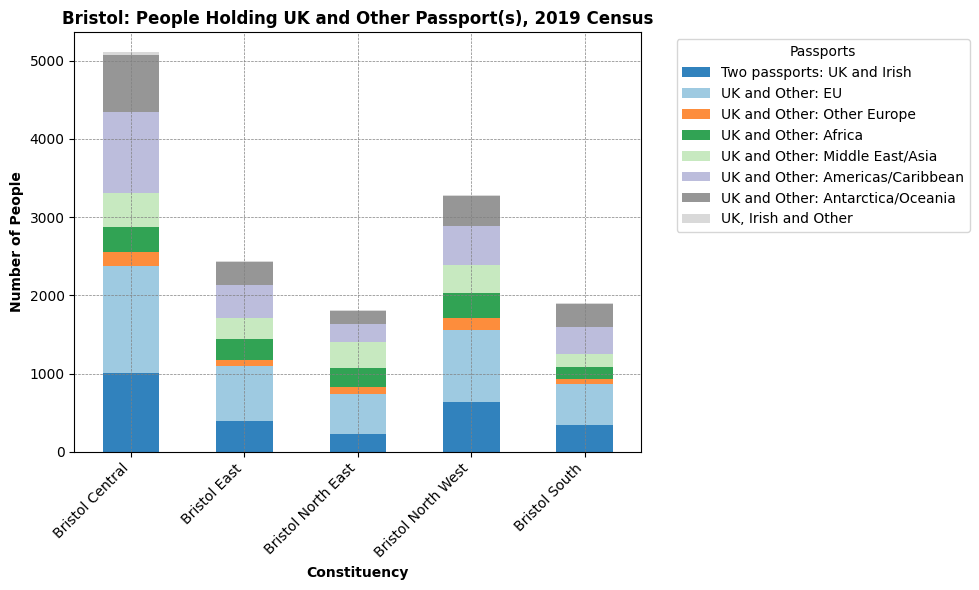

In [288]:
plt.figure(figsize=(10, 8))
labels = ["Two passports: UK and Irish", "UK and Other: EU", "UK and Other: Other Europe", "UK and Other: Africa", "UK and Other: Middle East/Asia", "UK and Other: Americas/Caribbean", "UK and Other: Antarctica/Oceania", "UK, Irish and Other"]

ax = mp.set_index('Passport').T.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(10, 6))
plt.title("Bristol: People Holding UK and Other Passport(s), 2019 Census", fontweight="semibold")
plt.xlabel("Constituency", fontweight = "demi")
plt.ylabel("Number of People", fontweight = "demi")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Passports", labels = labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle = '--', linewidth = 0.5, color = 'gray')
plt.tight_layout()
plt.show()

#### Creating DF with 'total' row

In [289]:
mp_total = mp
mp_total.loc["Total"] = mp_total.sum(numeric_only = True)
mp_total = mp_total.fillna("Total") ##When transposed, this will become the header
mp_total

,Passport,Bristol Central,Bristol East,Bristol North East,Bristol North West,Bristol South
9,Two passports held: UK and Irish passport,1002.0,395.0,221.0,630.0,337.0
10,"UK and Other passport: Europe, European Union",1372.0,698.0,522.0,929.0,526.0
11,"UK and Other passport: Europe, Other Europe",177.0,82.0,82.0,148.0,62.0
12,UK and Other passport: African,328.0,269.0,240.0,320.0,164.0
13,UK and Other passport: Middle East and Asian,431.0,271.0,334.0,355.0,155.0
14,UK and Other passport: The Americas and Caribbean,1040.0,416.0,240.0,498.0,351.0
15,UK and Other passport: Antarctica and Oceania ...,721.0,301.0,161.0,395.0,291.0
22,"UK, Irish, and Other passport",36.0,12.0,8.0,10.0,11.0
Total,Total,5107.0,2444.0,1808.0,3285.0,1897.0


In [290]:
## transpose the DF 
transposed = mp_total.transpose()
transposed.head(1)

,9,10,11,12,13,14,15,22,Total
Passport,Two passports held: UK and Irish passport,"UK and Other passport: Europe, European Union","UK and Other passport: Europe, Other Europe",UK and Other passport: African,UK and Other passport: Middle East and Asian,UK and Other passport: The Americas and Caribbean,UK and Other passport: Antarctica and Oceania ...,"UK, Irish, and Other passport",Total


In [291]:
## reset the index
transposed = transposed.reset_index()
## make the top row into the header
transposed.columns = transposed.iloc[0]
transposed = transposed[1:]

transposed.head(1)

,Passport,Two passports held: UK and Irish passport,"UK and Other passport: Europe, European Union","UK and Other passport: Europe, Other Europe",UK and Other passport: African,UK and Other passport: Middle East and Asian,UK and Other passport: The Americas and Caribbean,UK and Other passport: Antarctica and Oceania (including Australia),"UK, Irish, and Other passport",Total
1,Bristol Central,1002.0,1372.0,177.0,328.0,431.0,1040.0,721.0,36.0,5107.0


In [292]:
transposed = transposed.rename(columns={"Passport": "PCON24NM"}) #This will allow the DF to be merged with the shapefile.
transposed.head(1)

,PCON24NM,Two passports held: UK and Irish passport,"UK and Other passport: Europe, European Union","UK and Other passport: Europe, Other Europe",UK and Other passport: African,UK and Other passport: Middle East and Asian,UK and Other passport: The Americas and Caribbean,UK and Other passport: Antarctica and Oceania (including Australia),"UK, Irish, and Other passport",Total
1,Bristol Central,1002.0,1372.0,177.0,328.0,431.0,1040.0,721.0,36.0,5107.0


## Plotting data onto a map

#### Creating GDF from shapefile of post-2019 constituencies

In [293]:
## Checking the file path exists / is correct
shp_path = "Westminster_Parliamentary_Constituencies_July_2024_Boundaries_UK_BFE_-4312032117138067492.zip"
os.path.exists(shp_path)

True

In [294]:
gdf = geopandas.read_file("Westminster_Parliamentary_Constituencies_July_2024_Boundaries_UK_BFE_-4312032117138067492.zip")
gdf.head(3)

,PCON24CD,PCON24NM,PCON24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E14001063,Aldershot,None,484716,155270,-0.78648,51.2903,5f4043af-3ae2-43eb-a003-102bd7e1ebb5,"POLYGON ((483364.601 160961.805, 483370.702 16..."
1,E14001064,Aldridge-Brownhills,None,404720,301030,-1.93172,52.6070,049d5ca7-15e4-49d6-9baf-ca905bcc6b65,"POLYGON ((406519.098 305054.298, 406487.198 30..."
2,E14001065,Altrincham and Sale West,None,374132,389051,-2.39049,53.3977,e1c62e7b-12c2-41fe-8ebb-0bbe522f90eb,"POLYGON ((377443.302 393344.296, 377451.596 39..."


#### Exploring the shapefile: plotting constituency boundaries

<Axes: >

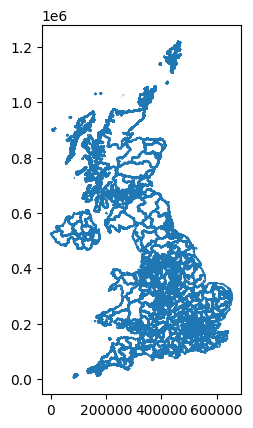

In [295]:
gdf.boundary.plot()

#### Creating GDF of Bristol

In [296]:
Bristol_gdf = gdf[gdf["PCON24NM"].str.contains("|".join(["Bristol"]))]
display(Bristol_gdf)

,PCON24CD,PCON24NM,PCON24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
68,E14001131,Bristol Central,None,358489,174042,-2.59893,51.4638,034d5c19-ff89-4254-b973-b985232997dd,"POLYGON ((360616.196 174623.104, 360646.703 17..."
69,E14001132,Bristol East,None,361940,170971,-2.54893,51.4364,e7f98ad6-38ea-477a-8127-9719dacd617a,"POLYGON ((363898.002 172548.998, 363886.797 17..."
70,E14001133,Bristol North East,None,363283,175262,-2.53005,51.4751,6e8ac667-0344-44d8-abf9-2e65bbd2af1a,"POLYGON ((366991.599 175387.495, 366989.726 17..."
71,E14001134,Bristol North West,None,355048,178219,-2.64899,51.5011,ea790efd-ffd6-4fd9-8da6-3fb542320aa4,"POLYGON ((356317.798 179608.597, 356407.1 1796..."
72,E14001135,Bristol South,None,358409,169600,-2.59956,51.4239,9f51bf2c-e6b0-40e9-b10d-cac30e10edce,"POLYGON ((360790.002 167610.501, 360777.296 16..."


#### Merging mp_total with Bristol_gdf

In [297]:
df_merged = Bristol_gdf.merge(transposed, how = "outer", on ="PCON24NM")
#df_merged["Total"] = df_merged["Total"].astype(int)
display(df_merged)


,PCON24CD,PCON24NM,PCON24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Two passports held: UK and Irish passport,"UK and Other passport: Europe, European Union","UK and Other passport: Europe, Other Europe",UK and Other passport: African,UK and Other passport: Middle East and Asian,UK and Other passport: The Americas and Caribbean,UK and Other passport: Antarctica and Oceania (including Australia),"UK, Irish, and Other passport",Total
0,E14001131,Bristol Central,None,358489,174042,-2.59893,51.4638,034d5c19-ff89-4254-b973-b985232997dd,"POLYGON ((360616.196 174623.104, 360646.703 17...",1002.0,1372.0,177.0,328.0,431.0,1040.0,721.0,36.0,5107.0
1,E14001132,Bristol East,None,361940,170971,-2.54893,51.4364,e7f98ad6-38ea-477a-8127-9719dacd617a,"POLYGON ((363898.002 172548.998, 363886.797 17...",395.0,698.0,82.0,269.0,271.0,416.0,301.0,12.0,2444.0
2,E14001133,Bristol North East,None,363283,175262,-2.53005,51.4751,6e8ac667-0344-44d8-abf9-2e65bbd2af1a,"POLYGON ((366991.599 175387.495, 366989.726 17...",221.0,522.0,82.0,240.0,334.0,240.0,161.0,8.0,1808.0
3,E14001134,Bristol North West,None,355048,178219,-2.64899,51.5011,ea790efd-ffd6-4fd9-8da6-3fb542320aa4,"POLYGON ((356317.798 179608.597, 356407.1 1796...",630.0,929.0,148.0,320.0,355.0,498.0,395.0,10.0,3285.0
4,E14001135,Bristol South,None,358409,169600,-2.59956,51.4239,9f51bf2c-e6b0-40e9-b10d-cac30e10edce,"POLYGON ((360790.002 167610.501, 360777.296 16...",337.0,526.0,62.0,164.0,155.0,351.0,291.0,11.0,1897.0


#### Plotting df_merged

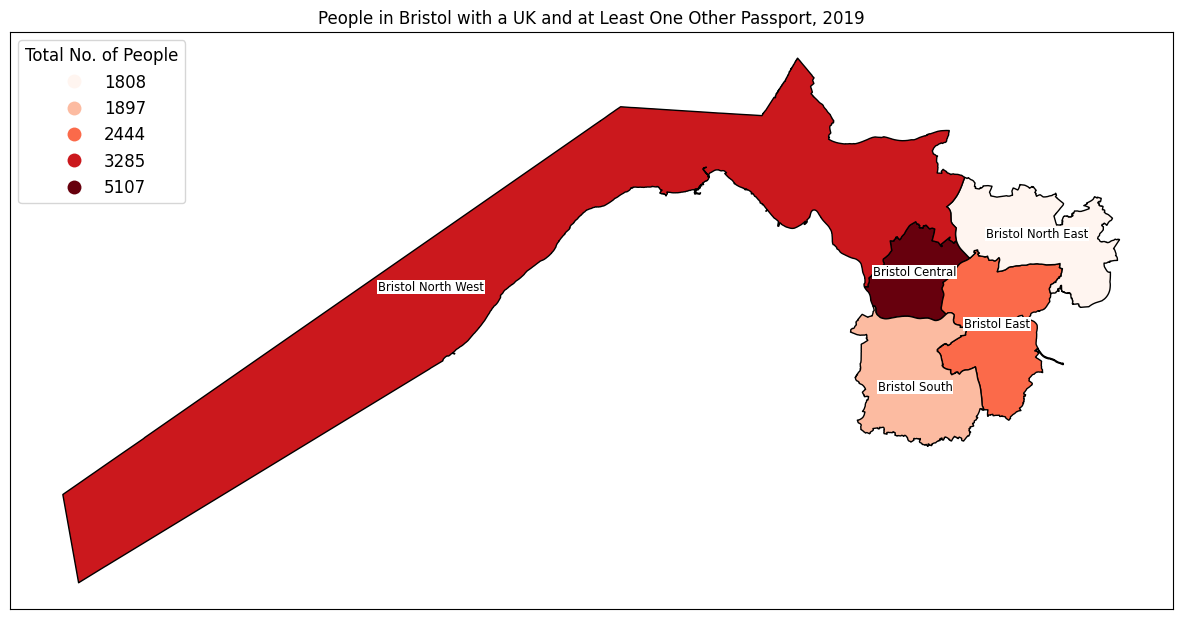

In [298]:
## Function to annotate each constituency (with customised placement if needed)
def annotate_map(ax, df_merged):
    for idx, row in df_merged.iterrows():
        ## Get the centroid of each shape
        centroid = row.geometry.centroid

        ## Default text_position
        text_position = (centroid.x, centroid.y)  # Can offset as needed eg. centroid.x + 1000, centroid.y+0.5

        ## Loop to adjust individual annotation (in this case, Bristol North West)
        if row['PCON24NM'] == "Bristol North West": 
            text_position = (centroid.x - 3000, centroid.y)
        elif row['PCON24NM'] == "Bristol South": 
            text_position = (centroid.x, centroid.y - 470)
        else:
            text_position = text_position

        ## Add the annotations, including background colour for improved visibility
        ax.annotate(
            text=row['PCON24NM'], 
            xy=(centroid.x, centroid.y), 
            xytext=text_position,
            ha='center',
            fontsize='small',
            bbox=dict(facecolor='white', edgecolor='none', pad=0.5), 
            color='black'  
        )

## Create plot
fig, ax = plt.subplots(figsize =(15,8))

## Set up the legend and colourmap
num_classes = 5
color_steps = plt.colormaps['Reds'].resampled(num_classes)

df_merged.plot(column = "Total", cmap = color_steps, 
               legend = True, 
               legend_kwds={'loc':'upper left',
                           'title_fontsize':'large',
                           'fontsize':'large'},
               edgecolor = 'black',
              ax=ax)

leg1 = ax.get_legend()
leg1.set_title("Total No. of People")

## Show legend numbers as int. 
## This loop modifies each label text in the legend: converts text to float, then to int. 
for text in leg1.get_texts():  
    text.set_text(f'{int(float(text.get_text()))}')  

## Add a title
ax.title.set_text("People in Bristol with a UK and at Least One Other Passport, 2019")

## Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Call the function to add annotations
annotate_map(ax, df_merged)

## Plot
plt.show()

#### Plotting labels with arrows

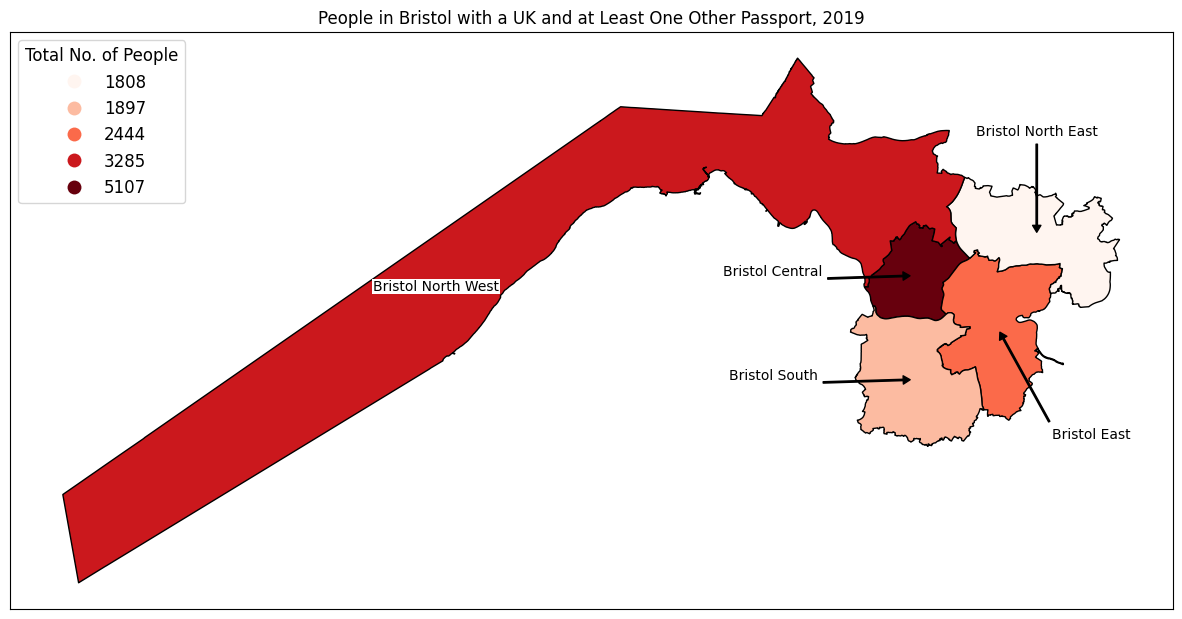

In [299]:
## Function to annotate each constituency (with customised placement if needed)
def annotate_outside(ax, df_merged):
    for idx, row in df_merged.iterrows():
        ## Get the centroid of each shape
        centroid = row.geometry.centroid

        ## Default text_position
        text_position = (centroid.x -6000, centroid.y)  # Can offset as needed eg. centroid.x + 1000, centroid.y+0.5

         ## Loop to adjust individual annotation and remove arrow from North West
        if row['PCON24NM'] == "Bristol North West": 
            text_position = (centroid.x - 2800, centroid.y)
            arrow_properties = None
        elif row['PCON24NM'] == "Bristol East": 
            text_position = (centroid.x + 4000, centroid.y - 4700)
        elif row['PCON24NM'] == "Bristol North East": 
            text_position = (centroid.x, centroid.y + 4300)
        else:
            text_position = text_position
            arrow_properties=dict(facecolor='black', shrink=0.05, width=1, headwidth=6, headlength=5)
            
        ## Add the annotations, including background colour for improved visibility
        ax.annotate(
            text=row['PCON24NM'], 
            xy=(centroid.x, centroid.y), 
            xytext=text_position,
            ha='center',
            fontsize='medium',
            arrowprops=arrow_properties,
            bbox=dict(facecolor='white', edgecolor='none', pad=0.5), 
            color='black'  
        )

## Create plot
fig, ax = plt.subplots(figsize =(15,8))

## Set up the legend and colourmap
num_classes = 5
color_steps = plt.colormaps['Reds'].resampled(num_classes)

df_merged.plot(column = "Total", cmap = color_steps, 
               legend = True, 
               legend_kwds={'loc':'upper left',
                           'title_fontsize':'large',
                           'fontsize':'large'},
               edgecolor = 'black',
              ax=ax)

leg1 = ax.get_legend()
leg1.set_title("Total No. of People")

## Show legend numbers as int. 
## This loop modifies each label text in the legend: converts text to float, then to int. 
for text in leg1.get_texts():  
    text.set_text(f'{int(float(text.get_text()))}')  

## Add a title
ax.title.set_text("People in Bristol with a UK and at Least One Other Passport, 2019")

## Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Call the function to add annotations
annotate_outside(ax, df_merged)

## Plot
plt.show()